## Imports

In [1]:
from random import randint, random
from math import exp
from timeit import timeit
from scipy.stats import binom , poisson
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from discreteVariablesMethods.discreteVariablesGenerators import RejectionMethod,InverseTransform,CompositionMethod
from discreteVariablesMethods.generateRandomPermutation   import generateRandomPermutation
from discreteVariablesMethods.meanEstimator import meanEstimator



## Ejercicio 1  
Se baraja un conjunto de n = 100 cartas (numeradas consecutivamente del 1 al 100) y se extrae
del mazo una carta por vez. Consideramos que ocurre un “éxito” si la i-ésima carta extraída es aquella cuyo
número es i (i = 1, . . . , n).
Simular la situación y calcular la esperanza y la varianza

In [2]:
    
def ej1Simulation(nCards,r):
    nSuccess = 0
    a = generateRandomPermutation([i for i in range(nCards)])
    for i in range(r):
        if i == a[i]:
            nSuccess += 1
            #print("Success with i = {}".format(i))
    return nSuccess


In [3]:
nSim = [100,1000,10000]
nCards = 100
r = 10
means = []
var = []
for N in nSim:
    successList = []
    for _ in range(N):
        successList.append(ej1Simulation(nCards,nCards))
    mean = (sum(successList)/N) 
    var = (np.var(successList))
    print("E[X] for {} iterations is {}".format(N,mean))
    print("Var[X] for {} iterations is {}\n".format(N,var))

E[X] for 100 iterations is 1.04
Var[X] for 100 iterations is 1.0384

E[X] for 1000 iterations is 0.977
Var[X] for 1000 iterations is 1.0024710000000003

E[X] for 10000 iterations is 1.0137
Var[X] for 10000 iterations is 1.0251123100000004



## Ejercicio 2
Queremos calcular  
![](images/ej2p4.jpg)

In [4]:
from math import exp
def f(x):
    return exp(x/10000)

meanEstimator(f,10000,100)

17521.448296746705

In [5]:
exactValue = 0
for i in range(10000):
    exactValue += f(i)
exactValue

17181.959157995243

## Ejercicio 3
Se lanzan simultáneamente un par de dados legales y se anota el resultado de la suma de ambos. El proceso se repite hasta que todos los resultados posibles: 2,3,...,12 hayan aparecido al menos una vez.Estudiar mediante una simulación la variable N, el número de lanzamientos necesarios para cumplir elproceso. Cada lanzamiento implica arrojar el parde dados.

In [6]:
def ej3simulation():
    n = 0 
    possibleResults = [0 for i in range(11)]
    while not all(possibleResults):
        result = randint(1,6) + randint(1,6)
        possibleResults[result-2] = 1
        n += 1
    return n

In [7]:
nSim = [100,1000,10000,100000]
for N in nSim:
    n = 0
    for _ in range(N):
        n += ej3simulation()
    print("The average of numbers of draws needed to complete the process is {} with {} simulations".format(n/N,N))        
    

The average of numbers of draws needed to complete the process is 66.76 with 100 simulations
The average of numbers of draws needed to complete the process is 61.044 with 1000 simulations
The average of numbers of draws needed to complete the process is 61.5645 with 10000 simulations
The average of numbers of draws needed to complete the process is 61.23834 with 100000 simulations


## Ejercicio 4
Una variable aleatoriaXtiene una funcion de probabilidad puntual pi=P(X=i) dada por: 
p0=0.15 p1=0.20  p2=0.10  p3=0.35  p4=0.20

In [2]:
ex4_p_i = {0:0.15,1:0.20,2:0.10,3:0.35,4:0.20}

# Inverse transformation
ex4InverseTransformGenerator = InverseTransform(ex4_p_i)

# Rejection method
def ex4_Y_generator():
    return InverseTransform().generateBinomialInt(4,0.45)
ex4_p_i = {0:0.15,1:0.20,2:0.10,3:0.35,4:0.20}

def supportDistribution(x):
    return binom.pmf(x,4,0.45)

ex4RejectionGenerator = RejectionMethod(
    Y_function=supportDistribution,
    Y_generator=ex4_Y_generator,
    X_function=ex4_p_i.get,
    n_values=len(ex4_p_i))

In [4]:
ex4RejectionGenerator.c

4.887305288827923

In [4]:
### Performance comparations:
n = 100
inverseT = [0] * n
rejection = [0] * n
for u in range(n):
    inverseT[u] = timeit("ex4InverseTransformGenerator.generateInt()",
    number = 100000,
    globals = globals())
    rejection[u] = timeit(setup = "ex4RejectionGenerator.generateInt()",
    number = 100000,
    globals = globals())

Text(0.5, 0.98, 'Comparación de tiempos de corrida')

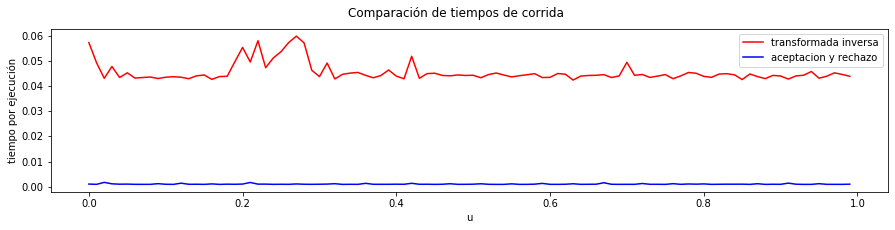

In [5]:
fig, ax = plt.subplots(figsize = (15,3))
ax.plot(inverseT, 'r', label = 'transformada inversa')
ax.plot(rejection, 'b', label = 'aceptacion y rechazo')
ax.set_xticklabels([str(i/5.) for i in range(6)])
ax.set_xticks([i for i in range(0,101,20)])
ax.set_xlabel('u')
ax.set_ylabel('tiempo por ejecución')

ax.legend(loc = 'best')

plt.suptitle('Comparación de tiempos de corrida')

## Ejercicio 5

Implemente tres métodos para generar una variable X que toma los valores del 1 al 10, con probabilidades p1=0.11, p2=0.14, p3=0.09, p4=0.08, p5=0.12, p6=0.10, p7=0.09, p8=0.07, p9=0.11, p10=0.09 usando:

In [6]:
ex5_p = {0:0.11,1:0.14,2:0.09,3:0.08,4:0.12,5:0.1,6:0.09,7:0.07,8:0.11,9:0.09}


In [34]:
# Inverse transformation
ex5InverseTransformationGenerator = InverseTransform(ex5_p)

# Rejection Method
def ex5SupportDistribution(x):
    return 1/len(ex5_p)

def ex5_Y_Generator():
    return randint(0,9)

ex5RejectionGenerator = RejectionMethod(
    Y_function=ex5SupportDistribution,
    Y_generator=ex5_Y_Generator,
    X_function =ex5_p.get,
    n_values = len(ex5_p)
    )

In [8]:
ex5RejectionGenerator.c

1.4100000000000001

In [10]:
def rechazoEj5(p):
    n = len(p)
    q = [1/n for _ in range(n)]
    assert(len(q)==len(p))
    c = 1
    # We use the optimum c, that is the largest one necessary
    for i in range(len(p)):
        if (p[i]/q[i]) >= c:
            c = p[i]/q[i]    
    res = 0
    u = random()
    y = randint(0,9)
    while u < p[y] / c * q[y]:
        u = random()
        res = y
    return res

### Método de la urna: 
utilizar un arreglo A de tamaño 100 donde cada valor i está en exactamente p(i)∗100 posiciones .El método debe devolver A[k] con probabilidad 0.01. ¿Por qué funciona?

In [14]:
def urneMethodEx5(p):
    A = [0] * 100
    initPos = 0
    n = len(p)
    for x in range(0,n):
        nPositions = int(p[x] * 100)
        for j in range(initPos,initPos+nPositions):
            A[j] = x
        initPos += nPositions
    u = randint(0,99)
    res = A[u]
    return res

In [15]:
### Comparación de tiempos:
n = 100
tInversa = [0] * n
aceptacionYrechazo = [0] * n
metodoUrna = [0] * n

for u in range(n):
    tInversa[u] = timeit("ex5InverseTransformationGenerator.generateInt()",
    number = 10000,
    globals = globals())
    aceptacionYrechazo[u] = timeit(setup = "ex5RejectionGenerator.generateInt()",
    number = 10000,
    globals = globals())
    metodoUrna[u] = timeit(setup = "urneMethodEx5(ex5_p)",
    number = 0,
    globals = globals())

Text(0.5, 0.98, 'Comparación de tiempos de corrida')

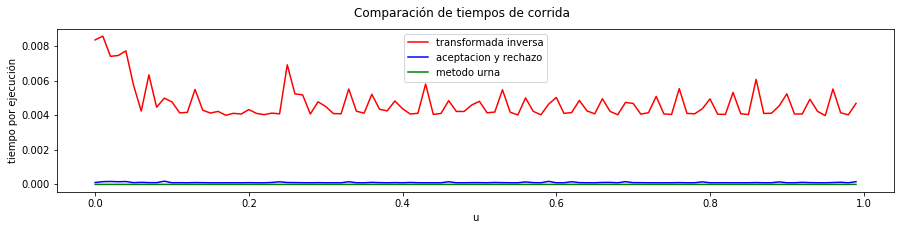

In [16]:
fig, ax = plt.subplots(figsize = (15,3))
ax.plot(tInversa, 'r', label = 'transformada inversa')
ax.plot(aceptacionYrechazo, 'b', label = 'aceptacion y rechazo')
ax.plot(metodoUrna,'g',label = 'metodo urna')
ax.set_xticklabels([str(i/5.) for i in range(6)])
ax.set_xticks([i for i in range(0,101,20)])
ax.set_xlabel('u')
ax.set_ylabel('tiempo por ejecución')

ax.legend(loc = 'best')

plt.suptitle('Comparación de tiempos de corrida')

## Ejercicio 6
Implemente dos métodos para generar una binomial Bin(n,p):  
i)  Usando transformada inversa.  
ii) Simulando n ensayos con probabilidad de éxito p y contando el número de éxitos.  


Para ambos métodos:  
- a)  Compare la eficiencia de ambos algoritmos para n=10 y p=0.3, evaluando el tiempo necesario para realizar 10000 simulaciones.  
- b)  Estime el valor con mayor ocurrencia y la proporción de veces que se obtuvieron los valores 0 y 10 respectivamente.
- c)  Compare estos valores con las probabilidades teóricas de la binomial. Si están alejados, revise el código.

In [17]:
## Inverse transformation
inverseTransformationBinomial = InverseTransform()
## Simulation 
def simulationEj6(n,p):
    successes = 0
    for _ in range(n):
        u = random()
        if u < p:
            successes+=1
    return successes

In [18]:
## Efficency comparison:
N = 100
tInversa = [0] * N
simulacion = [0] * N
n , p = 10, 0.3

for u in range(N):
    tInversa[u] = timeit("inverseTransformationBinomial.generateBinomialInt(n,p)", number = 100000, globals = globals())
    simulacion[u] = timeit(setup = "simulationEj6(n,p)", number = 100000, globals = globals())


Text(0.5, 0.98, 'Comparación de tiempos de corrida')

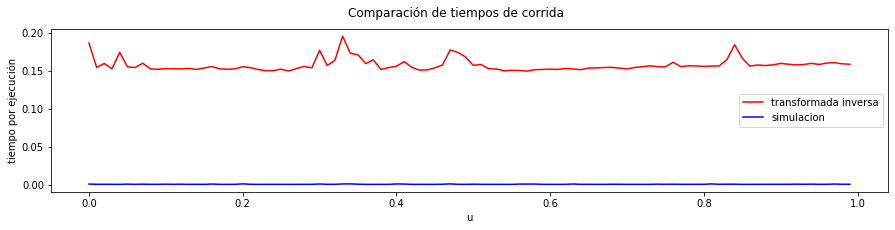

In [19]:
fig, ax = plt.subplots(figsize = (15,3))
ax.plot(tInversa, 'r', label = 'transformada inversa')
ax.plot(simulacion, 'b', label = 'simulacion')
ax.set_xticklabels([str(i/5.) for i in range(6)])
ax.set_xticks([i for i in range(0,101,20)])
ax.set_xlabel('u')
ax.set_ylabel('tiempo por ejecución')

ax.legend(loc = 'best')

plt.suptitle('Comparación de tiempos de corrida')

In [20]:
N = 10000
n , p = 10, 0.3
simR = []
tInvR = []
for _ in range(N):
    simR.append(simulationEj6(n,p))
    tInvR.append(inverseTransformationBinomial.generateBinomialInt(n,p))

(array([2.890e+02, 1.244e+03, 2.333e+03, 2.683e+03, 1.952e+03, 1.026e+03,
        3.780e+02, 7.600e+01, 1.800e+01, 1.000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

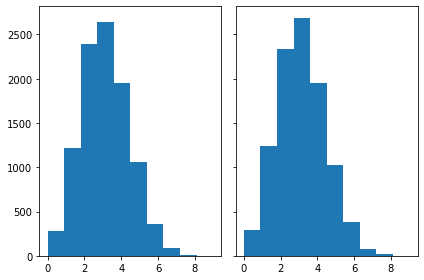

In [21]:
n_bins = 10

# Generate a normal distribution, center at x=0 and y=5
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(simR, bins=n_bins)
axs[1].hist(tInvR, bins=n_bins)

## ex 7 
Estime P(Y>2) con λ=0.7, y 1000 repeticiones para la variable Poisson simulando conmétodo de transformada inversa comun e inversa mejorado.

In [27]:
lamda = 0.7
N = 1000
naivePoisson = InverseTransform()
improvedPoisson = InverseTransform()
naivePoissonGreaterThan2Count = 0
improvedPoissonGreaterThan2Count = 0

for _ in range(N):
    if naivePoisson.generateNaivePoisson(lamda) > 2:
        naivePoissonGreaterThan2Count +=1
    if improvedPoisson.generatePoisson(lamda) > 2:
        improvedPoissonGreaterThan2Count +=1

print("With Naive Poisson P(Y > 2): {:.3f}".format(naivePoissonGreaterThan2Count / N))
print("With improved Poisson P(Y > 2): {:.3f}".format(improvedPoissonGreaterThan2Count / N))
print("Actual value: {:.3f}".format(1 - poisson.cdf(2,0.7)))

With Naive Poisson P(Y > 2): 0.042
With improved Poisson P(Y > 2): 0.032
Actual value: 0.034


## Ex 8
Desarrolle el método de la Trasformada Inversa y el de Rechazo para generar una variable aleatoria X cuya distribución de probabilidad está dada por:  
![](images/ej8.jpg)

In [10]:
from scipy.stats import binom,poisson
k = 10
lamda = 0.7
N = 1000

def P_x(lamda,k,i):
    top = poisson.pmf(i,lamda)
    bottom = sum(poisson.pmf(j, lamda) for j in range(k))
    return top/bottom


## We calculate the actual value. P(X>2) = 1 - P(X<=2)
actualValue = 1 - sum(P_x(lamda,k,i) for i in range(3))

# Inverse transformation
# We generate the distribution for each i:
p_i = {i:P_x(lamda,k,i) for i in range(k)}
# That's all we need for inverse transformation:
ex8InverseTransformGenerator = InverseTransform(p_i)

# Rejection method
# We will be using a poisson distribution as support function
ex8inverseTransform = InverseTransform()
ex8RejectionGenerator = RejectionMethod(
    Y_generator=(lambda: ex8inverseTransform.generatePoisson(lamda)),
    Y_function=(lambda x: poisson.pmf(x,lamda)),
    X_function=p_i.get,
    n_values=len(p_i))


ex8RejectionGreaterThan2Count = 0
ex8InverseTGreaterThan2Count = 0

for _ in range(N):
    if ex8RejectionGenerator.generateInt() > 2:
        ex8RejectionGreaterThan2Count +=1
    if ex8InverseTransformGenerator.generateInt() > 2:
        ex8InverseTGreaterThan2Count +=1

In [11]:
print("With Rejection Method P(Y > 2): {:.3f}".format(ex8RejectionGreaterThan2Count / N))
print("With Inverse Transformation P(Y > 2): {:.3f}".format(ex8InverseTGreaterThan2Count / N))
print("Actual value: {:.3f}".format(actualValue))

With Rejection Method P(Y > 2): 0.039
With Inverse Transformation P(Y > 2): 0.055
Actual value: 0.034


## Ex 9


In [24]:
N = 1000
# Using Composition method with X and Y geometric variables, alpha 1/2
XGenerator = InverseTransform()
YGenerator = InverseTransform()
ex9Generator = CompositionMethod(
    X_generator= (lambda: XGenerator.generateGeometricInt(1/2)),
    Y_generator= (lambda: YGenerator.generateGeometricInt(1/3)),
    alpha=1/2
)

ex9meanEstimate = 0
for _ in range(N):
    ex9meanEstimate += ex9Generator.generateInt()


print("Estimation of E[X]: {:.3f}".format(ex9meanEstimate/N))


Estimation of E[X]: 2.518


## Ex 10

Implemente dos métodos para simular una variable geométrica Geom(p):  
a) Usando transformada inversa y aplicando la fórmula recursiva para P(X = i).  
b) Simulando ensayos con probabilidad de éxito p hasta obtener un éxito.  
Compare la eficiencia de estos algoritmos para p = 0.8 y para p = 0.2.
Para cada caso, realize 10000 simulaciones y calcular el promedio de los valores obtenidos. Comparar estos
valores con el valor esperado de la distribución correspondiente. Si están alejados, revisar el código.

In [33]:
# We first generate recursive functions to calculate the mass probability funcion
# and the cummulative mass function

# Inverse transform recursive
def geometricPmf(i,p):
    if i == 1:
        return p
    else:
        return (1-p)*geometricPmf(i-1,p)

def inverseTransformGeometricRecursive(p):
    generatedValue = 1
    u = random()
    geomCmf = geometricPmf(1,p)
    while u > geomCmf:
        generatedValue += 1
        geomCmf += geometricPmf(generatedValue,p)
    return generatedValue

# Simulation
def ex10SimulateGeometricVariable(p):
    triesUntilSuccess = 1
    while random() > p:
        triesUntilSuccess += 1
    return triesUntilSuccess


In [34]:
## Efficency comparison:
N = 100
tInversa1 = [0] * N
simulacion1 = [0] * N
tInversa2 = [0] * N
simulacion2 = [0] * N

ps = [0.8,0.2]

for u in range(N):
    tInversa1[u] = timeit("inverseTransformGeometricRecursive(ps[0])", number = 10000, globals = globals())
    simulacion1[u] = timeit(setup = "ex10SimulateGeometricVariable(ps[0])", number = 10000, globals = globals())
    tInversa2[u] = timeit("inverseTransformGeometricRecursive(ps[0])", number = 10000, globals = globals())
    simulacion2[u] = timeit(setup = "ex10SimulateGeometricVariable(ps[1])", number = 10000, globals = globals())

Text(0.5, 0.98, 'Runtime p = 0.8')

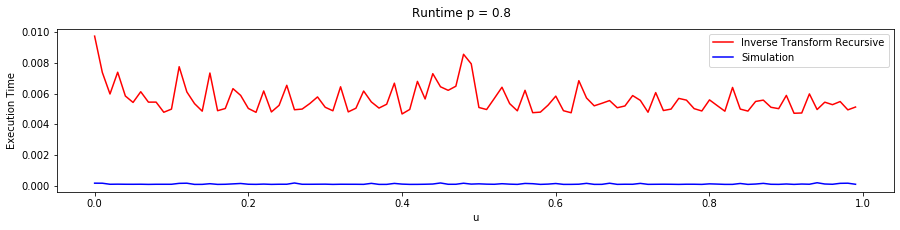

In [35]:
fig, ax = plt.subplots(figsize = (15,3))
ax.plot(tInversa1, 'r', label = 'Inverse Transform Recursive')
ax.plot(simulacion1, 'b', label = 'Simulation')
ax.set_xticklabels([str(i/5.) for i in range(6)])
ax.set_xticks([i for i in range(0,101,20)])
ax.set_xlabel('u')
ax.set_ylabel('Execution Time')

ax.legend(loc = 'best')

plt.suptitle('Runtime p = 0.8')

Text(0.5, 0.98, 'Runtime p = 0.2')

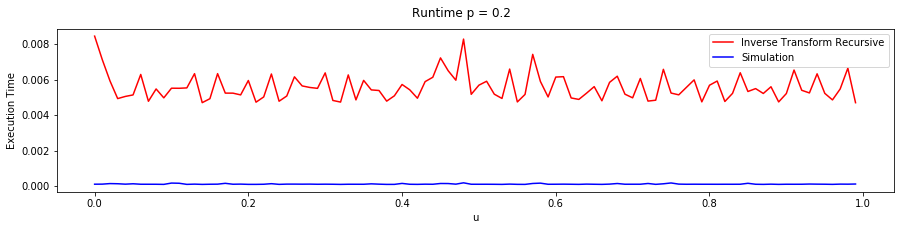

In [36]:
fig, ax = plt.subplots(figsize = (15,3))
ax.plot(tInversa2, 'r', label = 'Inverse Transform Recursive')
ax.plot(simulacion2, 'b', label = 'Simulation')
ax.set_xticklabels([str(i/5.) for i in range(6)])
ax.set_xticks([i for i in range(0,101,20)])
ax.set_xlabel('u')
ax.set_ylabel('Execution Time')

ax.legend(loc = 'best')

plt.suptitle('Runtime p = 0.2')


In [37]:
N = 10000
simR = []
tInvR = []
for _ in range(N):
    simR.append(ex10SimulateGeometricVariable(0.2))
    tInvR.append(inverseTransformGeometricRecursive(0.2))

(array([6.639e+03, 2.007e+03, 8.890e+02, 2.670e+02, 1.110e+02, 6.400e+01,
        1.100e+01, 8.000e+00, 2.000e+00, 2.000e+00]),
 array([ 1. ,  5.4,  9.8, 14.2, 18.6, 23. , 27.4, 31.8, 36.2, 40.6, 45. ]),
 <a list of 10 Patch objects>)

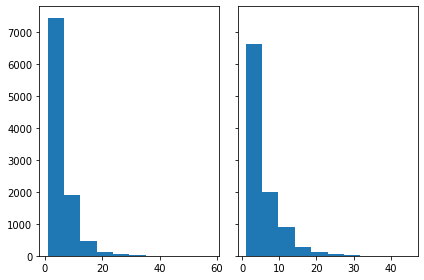

In [38]:
n_bins = 10

# Generate a normal distribution, center at x=0 and y=5
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(simR, bins=n_bins)
axs[1].hist(tInvR, bins=n_bins)

## Ex 11